In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to estimate the net profit of one product in one year, we need to know what factors it depends on. These could be:

*   sales volume in units
*   price per units (selling price)

*   cost per unit
*   fixed costs


The net profit will then be calculated as *Net Profit = Sales Volume * (Selling Price - Unit Cost) - Fixed Costs*.

The fixed cost could come from various overheads that the business and the product rely on. In this analysis the fixed cost amount is 120,000 dollars. Unit cost is also considered an uncertain variable. Let's assume that the unit cost of this particular product ranges anywhere from "$5.5 to $7.5", with the most likely expected cost of $6.5.
The mentioned factors above, could vary depending on random variables such as the market itself and the time of year.
The goal is to build a risk model that encapsulates these random variables and yields the best possible prediction. Let's assume that past experiences and a market research demonstrates three equal chances fro the market to be **Slow**, **Normal**, or **Hot**.




*  In a **Slow** market, we expect to sell **50,000** units at an average selling price of **$11.00** per unit

*   In a **Normal** market, you expect to sell **75,000** units, but you'll likely realize a lower average selling price of **$10.00** per unit


*   In a **Hot** market, you expect to sell **100,000** units, but this will bring in competitors, who will drive down the average selling price to **$8.00** per unit










1. Calculate the avergae units sold and the selling price, which depend on the market state.

In [73]:
import numpy as np

units = np.array([50000, 75000, 100000])
prices = np.array([11.0, 10.0, 8.0])

average_unit_sold = units.mean()
avergae_selling_price = prices.mean()

print("average units sold: %.0f" %(average_unit_sold))
print("average selling price : %.2f" %(avergae_selling_price))

average units sold: 75000
average selling price : 9.67


Now we know on average how many units are going to be sold and at what average price point. It is time to take into account the Fixed Costs and calculate the Net Profit.

**This model will not yield accurate results since it does not take into account randomness since it is only based in average assumptions.**

In [74]:
def CalNetProfit(average_unit_sold, avergae_selling_price, average_unit_cost, fixed_cost):
  return average_unit_sold*(avergae_selling_price-average_unit_cost)-fixed_cost

average_unit_cost = 6.5 #in dollars
fixed_cost = 120000 #in dollars

Net_Profit = CalNetProfit(average_unit_sold, avergae_selling_price, average_unit_cost, fixed_cost)
print("Net profit: %.0f$" %(Net_Profit))

true_net_profit = 93000 #based on the firm's evaluation (a given value for this study)
error = (Net_Profit -true_net_profit)/true_net_profit
print("Error in percentage: %.3f%%" %(error * 100))

Net profit: 117500$
Error in percentage: 26.344%


In this model, Market Scenario and Unit Cost were considered **independent random variables**. However, these are realistically correlated variables. In order to generate meaningful and accurate predictions, the model needs to account for the correlation between these variables. This can be achieved by the help of the Monte Carlo technique.


We must then define a function that returns the sales volume and unit prices based on the Market Scenario. Such as:


*   Slow Market = 0

*   Normal Market = 1
*   Hot Market = 2




In [75]:
# the function returns a tuple of (sales_volume, price)

def Get_Sales_Volume_Price(Scenraio):
  #slow market
  if Scenraio == 0:
    return (50000, 11.0)
  #normal market
  if Scenraio == 1:
    return (75000, 10.0)
  #hot market
  if Scenraio == 2:
    return (100000, 8.0)

To accurately predict the average net profit, we can get the help of a model based on Monte Calro simulation. We are going to run 100,000 MOnte Carlo simulations and plot the average of the distribution of the result of each run in the simulations.

In [108]:
import random
Total = np.array([])
num_simulations = 100000

for i in range(0, num_simulations):
  unit_cost = random.uniform(5.5, 7.5) # since the unit cost may vary between these values
  market_scenario = random.randint(0, 2) # random market scenario
  sales_volume, price = Get_Sales_Volume_Price(market_scenario)
  net_profit_MC = CalNetProfit(sales_volume, price, unit_cost, fixed_cost)
  Total = np.append(Total, net_profit_MC)

print("Estimated average net profit: %.3f$" %Total.mean())

#evaluating the error on the Monte Carlo Simulation Approach
Error_MC = (Total.mean() - true_net_profit)/ true_net_profit
print("Error on the MC simulation in percentage %.3f%%" %(np.abs(Error_MC * 100)))

Estimated average net profit: 92273.215$
Error on the MC simulation in percentage 0.781%


Plotting the Monte Carlo Net profit distribution:
The mean of the distribution showcases the average net profit.

Mean of the fitted Gaussian: 92273.22


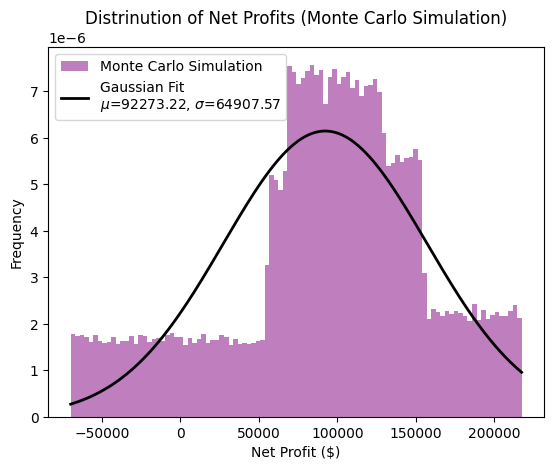

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import random

# Fit a Gaussian to the data
mu, sigma = norm.fit(Total)  # Mean and standard deviation
print(f"Mean of the fitted Gaussian: {mu:.2f}")

plt.hist(Total, bins=100, density=True, color = 'purple', alpha = 0.5, label='Monte Carlo Simulation')

# Plot gaussian curve
x = np.linspace(bins[0], bins[-1], 1000)
p = norm.pdf(x, mu, sigma)  # PDF of the fitted Gaussian

plt.plot(x, p, 'black', linewidth=2, label=f'Gaussian Fit\n$\mu$={mu:.2f}, $\sigma$={sigma:.2f}')

plt.title("Distrinution of Net Profits (Monte Carlo Simulation)")
plt.xlabel("Net Profit ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

This new estimated average net profit is much closer to the actual net profit associated with this product, with an error of only 0.722%.

The Monte Carlo technique (also called the **stochastic method**) was used due to the fact that random variables introduced in this problem were **independent** from one another. In addition, the Monte Carlo technique generates the output as a range and takes the mean of that distribution as the most likely result, as opposed to a fixed value. In other words, the MC model generates a **probability distribution**.  
